# 🧠 Rule-Based Systems (Expert Systems) — Introduction

Before machine learning became mainstream, many AI systems were built using **explicit rules**.  
These are known as **rule-based systems** or **expert systems**.

A **rule-based system** is built from:
- **IF conditions** (patterns we manually define)
- **THEN actions** (output, decision, category)

Example:
``IF petal length < 2 → flower is Iris-setosa``

### ✔ Key Characteristics
- Deterministic (no randomness)
- Transparent: we can explain every decision
- Easy to build for small problems
- Hard to scale for complex, noisy, or overlapping data

### ✔ Why Rule-Based Systems Matter
- They help us understand **simple decision boundaries**
- They connect naturally to **decision trees**
- They show the limitations of non-learning systems

In this notebook, we will build **a simple rule-based classifier for the Iris dataset** using manually created IF–THEN rules and compare it with real ML models.


In [ ]:
# 📘 Python: Load Iris Dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Python: Build a Simple Rule-Based Classifier
# We create a function with manually defined rules.

import numpy as np

def rule_based_iris_classifier(sample):
    petal_length = sample[2]
    petal_width = sample[3]
    sepal_length = sample[0]

    # Example rules
    if petal_length < 2:
        return 0  # Setosa
    elif petal_width < 1.8:
        return 1  # Versicolor
    else:
        return 2  # Virginica

# classify all samples
rule_predictions = np.array([rule_based_iris_classifier(x) for x in X])

Rule-Based System Accuracy: 0.96


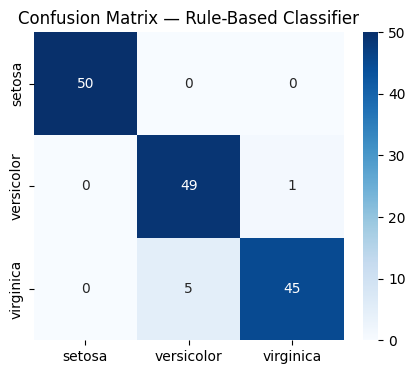

In [3]:
# Python: Evaluate Rule-Based System
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

acc = accuracy_score(y, rule_predictions)
print("Rule-Based System Accuracy:", acc)

cm = confusion_matrix(y, rule_predictions)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix — Rule-Based Classifier")
plt.show()

## 🚧 Limitations of Rule-Based Systems on Iris

Our rule-based model is simple and interpretable, but:

### ❌ It cannot learn new patterns  
If the data changes, rules must be updated manually.

### ❌ Rules overlap in feature space  
Versicolor and Virginica heavily overlap in petal length/width.

### ❌ No concept of distance or similarity  
It cannot compare how close a sample is to different classes.

### ❌ Fragile decision boundaries  
A tiny change in measurement may flip the decision drastically.

---

Next, we will compare this rule-based approach with:
- **Nearest Neighbor (1-NN)**
- **k-Nearest Neighbors (KNN)**

These methods *learn from data* without manually crafted rules.


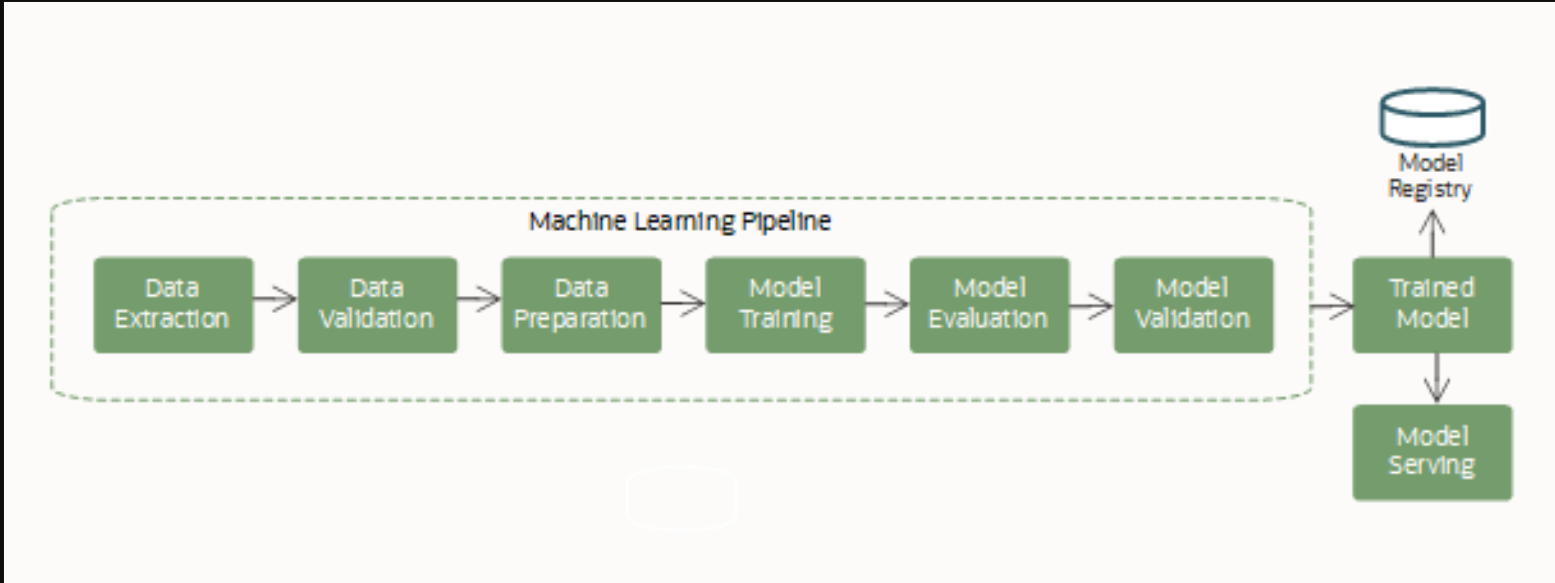

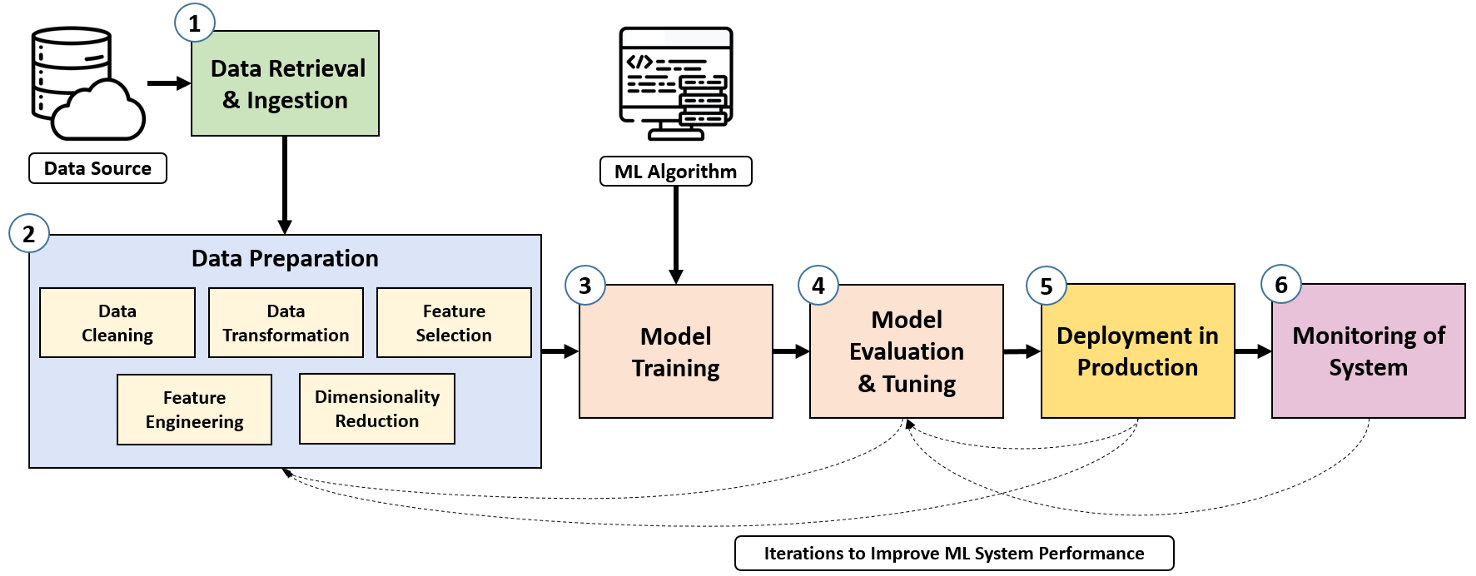

# 📚 Introduction to Classical Machine Learning

Welcome! In this notebook, we explore classical machine learning using four datasets:
- **Iris**
- **MNIST**
- **KDDCup99**
- **Labeled Faces in the Wild (LFW)**

We will use three core algorithms:
- **NN (Nearest Neighbor, k=1)**
- **KNN (k-Nearest Neighbors)**
- **KMeans (clustering)**

---

## 🧠 What is Classical Machine Learning?
Machine Learning is the study of algorithms that learn patterns from data and make predictions or decisions without being explicitly programmed. Classical ML refers to algorithms developed before deep learning became dominant.  
They remain important because they are:
- Data-efficient
- Easy to interpret
- Computationally inexpensive
- Strong baselines in real-world applications

Examples:
- Spam detection  
- Medical diagnosis  
- Intrusion detection  
- Image recognition  
- Customer segmentation

---

## 🎯 Types of Machine Learning

### **1. Supervised Learning**
We have features **X** and labels **y**.
Used for:
- Classification
- Regression

In this notebook:
- **NN (Nearest Neighbor)**
- **KNN**

---

### **2. Unsupervised Learning**

We have features **X** but *no* labels.

In this notebook:
- **KMeans clustering**

Used to:
- Discover groups
- Detect anomalies
- Explore structure

---

## 📏 Distance-Based Methods

NN, KNN, and KMeans rely on measuring the **distance** between data points.  
This makes them:
- Simple to understand
- Sensitive to feature scaling
- Good for visual explanations

---

## ⚠ The Curse of Dimensionality

As the number of features increases:
- Distances become less meaningful  
- Classification accuracy drops  
- Clustering becomes unreliable  

We will observe this when working with:
- MNIST (784-dimensional images)
- Faces (high-dimensional)

To address this:
- We use **feature scaling**
- We may use **PCA** to reduce dimensionality

---

## 🚀 Notebook Roadmap

We will study four datasets:

### **Iris (easy, 4D)**
- NN, KNN, KMeans

### **MNIST (harder, 784D)**
- KNN + PCA

### **KDDCup99 (real-world, messy)**
- Preprocessing
- NN / KNN classification

### **LFW Faces**
- PCA (Eigenfaces)
- KNN classification

Each section includes:
- Data exploration
- Preprocessing
- Model training
- Evaluation
- Visualizations


#### 1️⃣ IRIS Dataset – KNN and KMeans

In [36]:
# 1.1 Load the Iris dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris["target"] = y
print(df_iris.head())

# 1.2 Classification using KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
(105, 4)
(45, 4)


1.0

   target  cluster
0       0        1
1       0        1
2       0        1
3       0        1
4       0        1


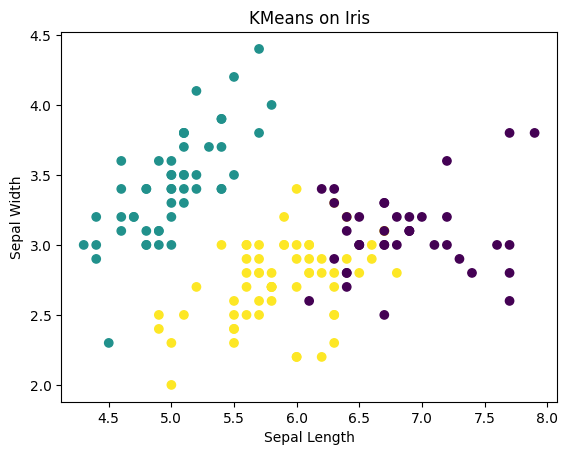

In [3]:
# 1.3 KMeans Clustering on Iris
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df_iris["cluster"] = clusters
print(df_iris[["target", "cluster"]].head())

# Visualize clustering
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
plt.title("KMeans on Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

### 2️⃣ MNIST Dataset – KNN

In [39]:
# 2.1 Load MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
X = mnist.data / 255.0   # Normalize
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("784:",accuracy_score(y_test, knn.predict(X_test)))

# 2.2 PCA + KNN (strong baseline)
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

print("50:",accuracy_score(y_test, knn.predict(X_test_pca)))

(56000, 784)
(14000, 784)
784: 0.9712857142857143
(56000, 50)
50: 0.9772142857142857


In [43]:
(0.029*14000),(0.022*14000)

(406.0, 308.0)

### 3️⃣ KDDCup99 – Anomaly Detection & Classification

In [49]:
# 3.1 Load the dataset
from sklearn.datasets import fetch_kddcup99

kdd = fetch_kddcup99(subset='SA', shuffle=True, percent10=True)
X = kdd.data
# y = kdd.target
y = kdd.target.astype(str)



# 3.2 Convert categorical → numerical
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame(X)
print(df.shape)
print(df.head())
cat_cols = [1, 2, 3]  # protocol, service, flag

enc = OneHotEncoder(sparse_output=False)
cat_encoded = enc.fit_transform(df[cat_cols])

df_num = df.drop(cat_cols, axis=1)
X_processed = pd.concat([pd.DataFrame(cat_encoded), df_num], axis=1)

print(X_processed.head())

# 3.3 KNN Classifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print("acc:",accuracy_score(y_test, y_pred))
print(np.unique(y_test,return_counts=True))

(100655, 41)
  0       1           2       3    4     5  6  7  8  9   ...   31   32    33  \
0  0  b'tcp'     b'http'  b'REJ'    0     0  0  0  0  0  ...    9  255   1.0   
1  0  b'tcp'     b'http'   b'SF'  238  5628  0  0  0  0  ...  234  255   1.0   
2  5  b'udp'  b'private'   b'SF'  105   147  0  0  0  0  ...  255  215  0.84   
3  0  b'tcp'     b'http'   b'SF'  312   398  0  0  0  0  ...  255  255   1.0   
4  0  b'tcp'     b'http'   b'SF'  215  1529  0  0  0  0  ...   51   80   1.0   

     34    35    36   37    38   39    40  
0   0.0  0.11  0.16  0.0   0.0  1.0   1.0  
1   0.0   0.0  0.02  0.0   0.0  0.0   0.0  
2  0.01  0.01   0.0  0.0   0.0  0.0   0.0  
3   0.0   0.0   0.0  0.0   0.0  0.0   0.0  
4   0.0  0.02  0.04  0.0  0.01  0.0  0.06  

[5 rows x 41 columns]
    0    1    2    3    4    5    6    7    8    9   ...   31   32    33  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    9  255   1.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  234  255 

### 4️⃣ Faces Dataset – LFW (People Face Recognition)

In [50]:
# 4.1 Load Faces Dataset
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split

faces = fetch_lfw_people(min_faces_per_person=40, resize=0.4)

X = faces.data
y = faces.target
h, w = faces.images[0].shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Image shape:", (h, w))
print("Data shape:", X.shape)
print("Label shape:", y.shape)
print("Label unique:", len(np.unique(y)))
print("Label counts:", np.unique(y,return_counts=True))
print("Label counts train:", np.unique(y_train,return_counts=True))
print("Label counts test:", np.unique(y_test,return_counts=True))

Image shape: (50, 37)
Data shape: (1867, 1850)
Label shape: (1867,)
Label unique: 19
Label counts: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([ 77,  42, 236, 121, 530, 109,  44,  71,  52,  55,  42,  53,  60,
        41,  41,  48,  52, 144,  49]))
Label counts train: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([ 61,  27, 175,  87, 395,  86,  33,  53,  41,  41,  33,  40,  44,
        30,  31,  33,  39, 110,  41]))
Label counts test: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([ 16,  15,  61,  34, 135,  23,  11,  18,  11,  14,   9,  13,  16,
        11,  10,  15,  13,  34,   8]))


In [51]:
# 4.2 PCA (Eigenfaces) + KNN
from sklearn.decomposition import PCA

# 4.3 KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

accuracy = accuracy_score(y_test, knn.predict(X_test))
print("accuracy:",accuracy)


pca = PCA(n_components=150, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 4.3 KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

accuracy = accuracy_score(y_test, knn.predict(X_test_pca))
print("accuracy pca:",accuracy)

accuracy: 0.4411134903640257
accuracy pca: 0.5546038543897216


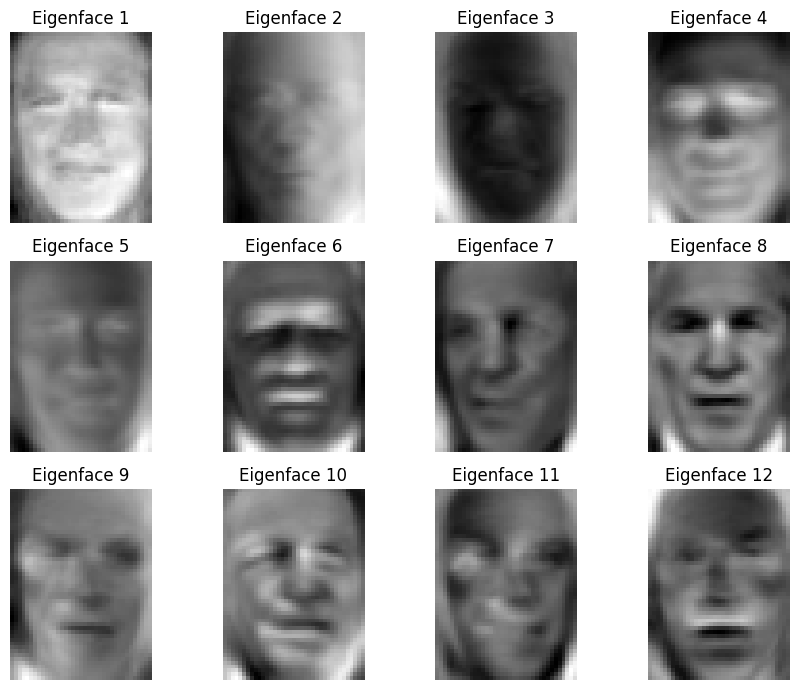

In [5]:
# 📌 Load Faces Dataset
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = faces.data
y = faces.target
h, w = faces.images[0].shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# ⭐ PCA for Eigenfaces
pca = PCA(n_components=150, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# 📸 Plot First 12 Eigenfaces (PCA Components)
fig, axes = plt.subplots(3, 4, figsize=(9, 7))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pca.components_[i].reshape(h, w), cmap="gray")
    ax.set_title(f"Eigenface {i+1}")
    ax.axis("off")
plt.tight_layout()
plt.show()

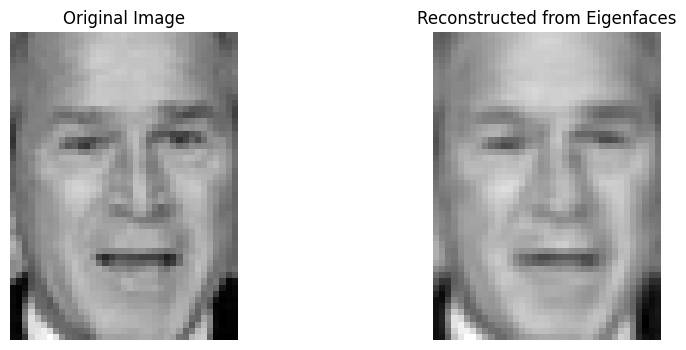

In [3]:
# 🎭 Plot Original Image vs Reconstructed using Eigenfaces
index = 10  # pick any image
original = X_test[index]

# project + reconstruct
proj = X_test_pca[index]
recon = pca.inverse_transform(proj)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(original.reshape(h, w), cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(recon.reshape(h, w), cmap='gray')
plt.title("Reconstructed from Eigenfaces")
plt.axis("off")

plt.show()

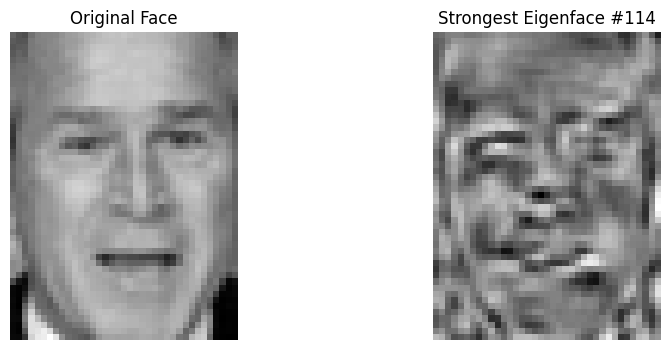

In [6]:
# 🎨 Plot Image + Top Matching Eigenface Component
comp_idx = np.argmax(np.abs(proj))  # strongest PCA component
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(original.reshape(h, w), cmap='gray')
plt.title("Original Face")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(pca.components_[comp_idx].reshape(h, w), cmap='gray')
plt.title(f"Strongest Eigenface #{comp_idx}")
plt.axis("off")

plt.show()


# This shows how the face aligns with the PCA basis

### ✅ Nearest Neighbor (NN = 1-NN) and KNN (k-Nearest Neighbors)
NN (Nearest Neighbor = k=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Example using Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for distance-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NN = Nearest Neighbor = k=1
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_train_scaled, y_train)

y_pred_nn = nn.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("accuracy:",accuracy_nn)

✔ Teaching Points for NN (1-NN)

Fast to train (just stores data)

Very sensitive to noise (only the closest neighbor matters)

Decision boundaries are jagged and unstable

Works surprisingly well on clean low-dimensional data

In [ ]:
# KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("accuracy:",accuracy_knn)

✔ Teaching Points for KNN

Increasing k reduces noise influence

Large k = smoother decision boundaries

Still sensitive to:

    scaling

    high-dimensional spaces (curse of dimensionality)

Works well with medium-sized datasets

In [ ]:
import matplotlib.pyplot as plt

plt.bar(["1-NN", "5-NN"], [accuracy_nn, accuracy_knn])
plt.ylabel("Accuracy")
plt.title("1-NN vs 5-NN on Iris Dataset")
plt.show()

### ✅ 1. Nearest Neighbor (1-NN) vs KNN in Pure Python Using Iris

Includes:

Manual distance computation

Manual NN and KNN classification

Full plotting of classification process

Lines drawn from the query point → neighbors

Misclassified examples to show why KNN is needed

In [12]:
# 📌 Import and Prepare Iris Dataset
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

iris = load_iris()
X = iris.data[:, :2]  # use first 2 features for 2D plotting (sepal length, sepal width)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# ✅ Pure Python Distance Function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [14]:
# ⭐ Nearest Neighbor Classifier (1-NN) — Pure Python
def nearest_neighbor_predict(x, X_train, y_train):
    distances = [euclidean_distance(x, x_trn) for x_trn in X_train]
    idx = np.argmin(distances)
    return y_train[idx], idx, distances[idx]

In [15]:
# ⭐ KNN Classifier (Pure Python)
def knn_predict(x, X_train, y_train, k=5):
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    sorted_idx = np.argsort(distances)[:k]
    # majority vote
    votes = y_train[sorted_idx]
    return np.bincount(votes).argmax(), sorted_idx, distances

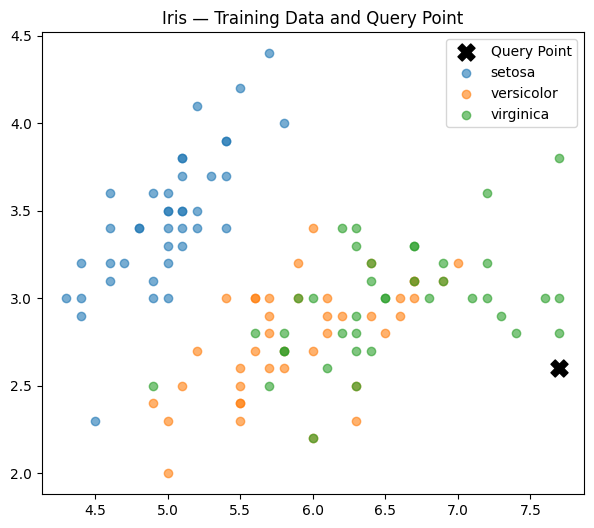

In [16]:
# --------------------------------------------
# 🎨 Plotting NN and KNN Step-by-Step
# --------------------------------------------
# Pick a random test point
i = np.random.randint(0, len(X_test))
query = X_test[i]
query_label = y_test[i]

# 📌 Plot: All training points + query point
plt.figure(figsize=(7,6))
plt.scatter(query[0], query[1], c='black', s=150, marker='X', label='Query Point')
for label in np.unique(y_train):
    plt.scatter(
        X_train[y_train==label,0], 
        X_train[y_train==label,1], 
        label=iris.target_names[label], alpha=0.6
    )

plt.title("Iris — Training Data and Query Point")
plt.legend()
plt.show()

nearest_neighbor label: 2
predicted label: 2


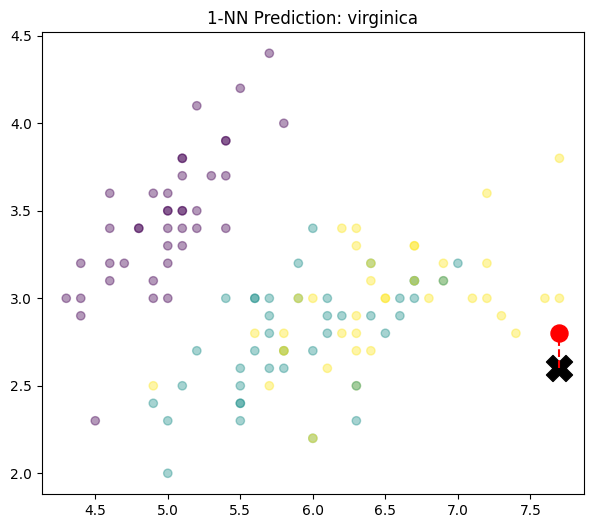

In [17]:
# 🔵 Plot Nearest Neighbor (1-NN)
nn_pred, nn_idx, nn_dist = nearest_neighbor_predict(query, X_train, y_train)
nn_point = X_train[nn_idx]

print("nearest_neighbor label:",y_train[nn_idx])
print("predicted label:",nn_pred)

plt.figure(figsize=(7,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.4)
plt.scatter(query[0], query[1], c='black', s=350, marker='X')

# highlight NN
plt.scatter(nn_point[0], nn_point[1], c='red', s=150)
plt.plot([query[0], nn_point[0]], [query[1], nn_point[1]], 'r--')

plt.title(f"1-NN Prediction: {iris.target_names[nn_pred]}")
plt.show()

true label: 2
predicted label: 2


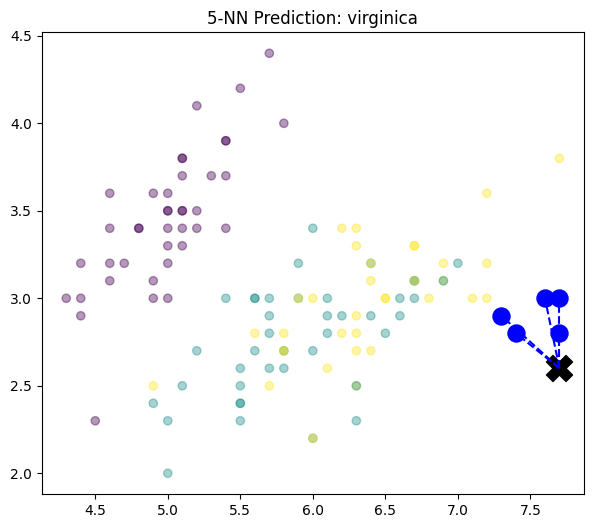

In [19]:
# 🔶 Plot KNN (k=5)
k = 5
knn_pred, knn_indices, distances = knn_predict(query, X_train, y_train, k=k)

print("true label:",query_label)
print("predicted label:",knn_pred)

plt.figure(figsize=(7,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.4)
plt.scatter(query[0], query[1], c='black', s=350, marker='X')

for idx in knn_indices:
    p = X_train[idx]
    plt.scatter(p[0], p[1], c='blue', s=150)
    plt.plot([query[0], p[0]], [query[1], p[1]], 'b--')

plt.title(f"{k}-NN Prediction: {iris.target_names[knn_pred]}")
plt.show()

[4, 10]
label vs prediction (NN): 1 2
label vs prediction (KNN): 1 1
[76 54 92 18 80]
[2 1 1 1 1]
[[6.8 3. ]
 [6.7 3. ]
 [6.6 2.9]
 [6.6 3. ]
 [6.5 2.8]]


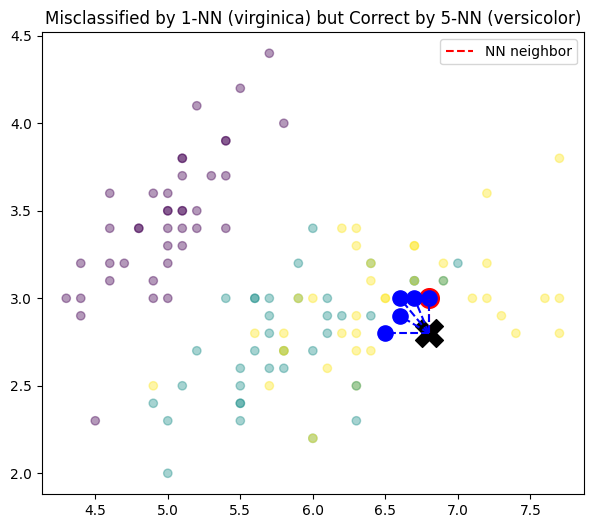

In [28]:
# ⚠️ Show Misclassified Samples (Why KNN Helps)
misclassified_indexes = []
for j in range(len(X_test)):
    pred_1nn, _, _ = nearest_neighbor_predict(X_test[j], X_train, y_train)
    pred_knn, _, _ = knn_predict(X_test[j], X_train, y_train, k=5)
    if pred_1nn != y_test[j] and pred_knn == y_test[j]:
        misclassified_indexes.append(j)

print(misclassified_indexes[:5])
j = misclassified_indexes[0]
query = X_test[j]
query_label = y_test[j]

nn_pred, nn_idx, _ = nearest_neighbor_predict(query, X_train, y_train)
knn_pred, knn_indices, _ = knn_predict(query, X_train, y_train, k=5)

print("label vs prediction (NN):",query_label,nn_pred)
print("label vs prediction (KNN):",query_label,knn_pred)

plt.figure(figsize=(7,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.4)
plt.scatter(query[0], query[1], c='black', s=400, marker='X')

# NN (wrong)
nn_point = X_train[nn_idx]
plt.scatter(nn_point[0], nn_point[1], c='red', s=200)
plt.plot([query[0], nn_point[0]], [query[1], nn_point[1]], 'r--', label='NN neighbor')

# KNN neighbors
print(knn_indices)
print(y_train[knn_indices])
print(X_train[knn_indices,:])

for idx in knn_indices:
    p = X_train[idx]
    plt.scatter(p[0], p[1], c='blue', s=120)
    plt.plot([query[0], p[0]], [query[1], p[1]], 'b--')

plt.title(
    f"Misclassified by 1-NN ({iris.target_names[nn_pred]}) but Correct by 5-NN ({iris.target_names[knn_pred]})"
)
plt.legend()
plt.show()
